# COMP 551 Mini Project 2

## Task 1: Acquire and preprocess the data

Acronyms used for the datasets in this notebook
- 20 news groups (20N)
- IMDB reviews (IMDB)





In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.random import permutation
from IPython.core.debugger import set_trace  
from sklearn.datasets import fetch_20newsgroups
from sklearn.linear_model import LogisticRegression
import os
!pip install mglearn
import mglearn

# Set the seed for reproducibility (initializes the random number generator)
np.random.seed(500)

     |████████████████████████████████| 542kB 11.6MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=953b5a8102a8708a041bcbc922b105e6c3232922ca17c77f273624178fb36159
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


### 1.1 Import text data


#### 20NewsGroups

In [5]:
# 20N
# Code Examples:
# https://www.programcreek.com/python/example/104689/sklearn.datasets.fetch_20newsgroups

# sklearn.datasets.fetch_20newsgroups(*, data_home=None, subset='train', categories=None, shuffle=True, 
                                              # random_state=42, remove=(), download_if_missing=True, return_X_y=False)
categories = None

twenty_train = fetch_20newsgroups(subset='train',
    categories=categories, shuffle=True, random_state=42, remove=('headers', 'footers', 'quotes'))
twenty_test = fetch_20newsgroups(subset='test',
    categories=categories, shuffle=True, random_state=42, remove=('headers', 'footers', 'quotes'))

# 20 categories in the dataset
category = twenty_train['target_names']

twenty_train = [(' '.join(d.split()), t) for d, t in zip(twenty_train['data'], twenty_train['target'])]
twenty_test = [(' '.join(d.split()), t) for d, t in zip(twenty_test['data'], twenty_test['target'])]

In [6]:
print(twenty_train[:5])
print(twenty_test[:5])

# Converting lists of tuples into pandas Dataframe. 
news_tr = pd.DataFrame(twenty_train, columns = ['text', 'label']) 
news_te = pd.DataFrame(twenty_test, columns = ['text', 'label']) 
display(news_tr.head())
display(news_te.head())

[('I was wondering if anyone out there could enlighten me on this car I saw the other day. It was a 2-door sports car, looked to be from the late 60s/ early 70s. It was called a Bricklin. The doors were really small. In addition, the front bumper was separate from the rest of the body. This is all I know. If anyone can tellme a model name, engine specs, years of production, where this car is made, history, or whatever info you have on this funky looking car, please e-mail.', 7), ("A fair number of brave souls who upgraded their SI clock oscillator have shared their experiences for this poll. Please send a brief message detailing your experiences with the procedure. Top speed attained, CPU rated speed, add on cards and adapters, heat sinks, hour of usage per day, floppy disk functionality with 800 and 1.4 m floppies are especially requested. I will be summarizing in the next two days, so please add to the network knowledge base if you have done the clock upgrade and haven't answered thi

,text,label
0,I was wondering if anyone out there could enli...,7
1,A fair number of brave souls who upgraded thei...,4
2,"well folks, my mac plus finally gave up the gh...",4
3,Do you have Weitek's address/phone number? I'd...,1
4,"From article <C5owCB.n3p@world.std.com>, by to...",14


,text,label
0,I am a little confused on all of the models of...,7
1,I'm not familiar at all with the format of the...,5
2,"In a word, yes.",0
3,They were attacking the Iraqis to drive them o...,17
4,I've just spent two solid months arguing that ...,19


#### IMDB

In [7]:
# IMDB, attach the dataset to folder tree
# Comment the following two lines if files already present in Colab folder tree 
!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar --gunzip --extract --file=aclImdb_v1.tar.gz

--2021-03-01 00:40:58--  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz’

aclImdb_v1.tar.gz   100%[===================>]  80.23M  17.3MB/s    in 11s     

2021-03-01 00:41:09 (7.39 MB/s) - ‘aclImdb_v1.tar.gz’ saved [84125825/84125825]



In [8]:
# IMDB reviews dataset
X_train_movies, y_train_movies, X_test_movies, y_test_movies = [], [], [], []

# read raw text from directories
for pos_ex in os.listdir('aclImdb/train/pos'):
    with open(os.path.join('aclImdb/train/pos', pos_ex)) as f:
        X_train_movies += f.readlines()
        y_train_movies += [1]

for neg_ex in os.listdir('aclImdb/train/neg'):
    with open(os.path.join('aclImdb/train/neg', neg_ex)) as f:
        X_train_movies += f.readlines()
        y_train_movies += [0]

for pos_ex in os.listdir('aclImdb/test/pos'):
    with open(os.path.join('aclImdb/test/pos', pos_ex)) as f:
        X_test_movies += f.readlines()
        y_test_movies += [1]

for neg_ex in os.listdir('aclImdb/test/neg'):
    with open(os.path.join('aclImdb/test/neg', neg_ex)) as f:
        X_test_movies += f.readlines()
        y_test_movies += [0]

In [9]:
# Converting lists into pandas Dataframe. 
movies_tr = pd.DataFrame({'text' : X_train_movies,
                             'label' : y_train_movies })
movies_te = pd.DataFrame({'text' : X_test_movies,
                            'label' : y_test_movies })

# preview the first 5 lines
display(movies_tr.head())
display(movies_te.head())

,text,label
0,Home Room was a great movie if you've ever had...,1
1,I lived in Tokyo for 7 months. Knowing the rea...,1
2,"'De Grot' is a terrific Dutch thriller, based ...",1
3,It was hard for me to believe all of the negat...,1
4,"Without ""mental anachronism"", this film which ...",1


,text,label
0,I saw Heaven's Gate on its opening week nearly...,1
1,I got this as a complete set of 9 episodes on ...,1
2,"Unlike some of the former commentators, I was ...",1
3,No matter what country your In you have to buy...,1
4,"This is Burt Reynolds'""Citizen Kane"".Tragicall...",1


### 1.2 Data preprocessing

###### Functions

In [10]:
from nltk import pos_tag, word_tokenize          
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [11]:
tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
stop_words = stopwords.words('english')

##### Execute Text Preprocessing 

In [12]:
X_train_news, y_train_news, X_test_news, y_test_news = [],[],[],[]
X_train_movies, y_train_movies, X_test_movies, y_test_movies = [], [], [], []

# tokenize & lemmatize
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in tokenizer.tokenize(text.lower())]

X_train_news = news_tr['text'].apply(lemmatize_text)
X_test_news = news_te['text'].apply(lemmatize_text)
X_train_movies = movies_tr['text'].apply(lemmatize_text)
X_test_movies = movies_te['text'].apply(lemmatize_text)

#remove stop words
stop_words = nltk.corpus.stopwords.words('english')
def removeStopwords(words):
    word = [i for i in words if i not in stop_words]
    return word

# X_train_news = X_train_news.apply(lambda i: removeStopwords(i))
# X_test_news = X_test_news.apply(lambda i: removeStopwords(i))
# X_train_movies = X_train_movies.apply(lambda i: removeStopwords(i))
# X_test_movies = X_test_movies.apply(lambda i: removeStopwords(i))

In [13]:
# Put preprocessed data into dataframes 
# 20news data
news_tr['text'] = X_train_news
news_te['text'] = X_test_news

# IMDB
movies_tr['text'] = X_train_movies
movies_te['text'] = X_test_movies

# Shuffle Both
news_train = news_tr.sample(frac=1,random_state=1).reset_index(drop=True)
news_test = news_te.sample(frac=1,random_state=1).reset_index(drop=True)
movies_train = movies_tr.sample(frac=1,random_state=1).reset_index(drop=True)
movies_test = movies_te.sample(frac=1,random_state=1).reset_index(drop=True)

In [34]:
# preview 5 lines
# display(news_train.head())
# display(news_test.head())
# display(movies_train.head())
# display(movies_test.head())
# q = news_tr.loc[news_tr['label'] == 7]
# display(q.head())
# print(news_train.loc[news_train['label'].isin([8])])

In [80]:
# Export to CSV
news_train.to_csv(r'news_train.csv', index=False)
news_test.to_csv(r'news_test.csv',index=False)
movies_train.to_csv(r'movies_train.csv',index=False)
movies_test.to_csv(r'movies_test.csv',index=False)

In [81]:
# Download CSV files
from google.colab import files
file_list=['news_train.csv','news_test.csv','movies_train.csv','movies_test.csv']
for f in file_list:
  files.download(f)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### 1.3 Statistical Analysis
 > Performed on processed data

Check for positive/negative datapoint distribution

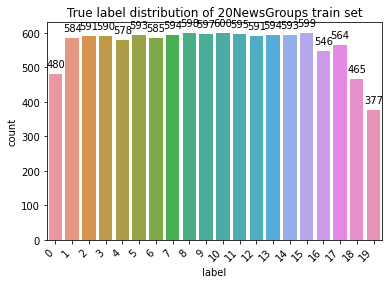

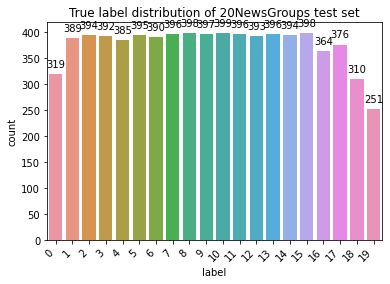

In [82]:
# 20N train
ax = sns.countplot(x='label', data=pd.DataFrame(news_train, columns=['label']))
ax.set_title("True label distribution of 20NewsGroups train set")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right')
for p in ax.patches:
  ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

# 20N test
ax = sns.countplot(x='label', data=pd.DataFrame(news_test, columns=['label']))
ax.set_title("True label distribution of 20NewsGroups test set")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right')
for p in ax.patches:
  ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

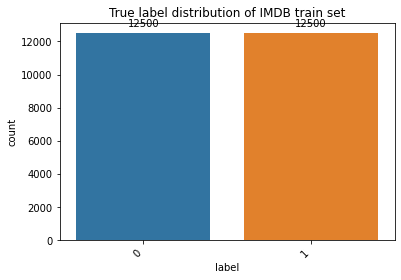

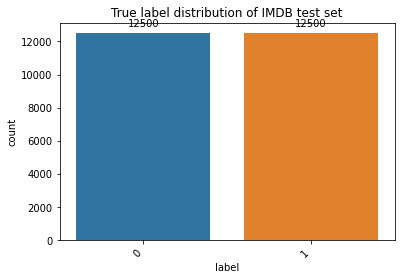

In [83]:
# IMDB train
ax = sns.countplot(x='label', data=pd.DataFrame(movies_train, columns=['label']), order=[0, 1])
ax.set_title("True label distribution of IMDB train set")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right')
for p in ax.patches:
  ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

# IMDB test
ax = sns.countplot(x='label', data=pd.DataFrame(movies_test, columns=['label']), order=[0, 1])
ax.set_title("True label distribution of IMDB test set")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right')
for p in ax.patches:
  ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

### 1.4 Feature Extraction 
> This step is done offline using .py file

In [14]:
# Reduce the text into a set of features 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
count_vectorizer = CountVectorizer(stop_words='english')
tfidf_vectorizer = TfidfVectorizer(analyzer=lambda x: x, stop_words='english', lowercase=False, min_df=5)

In [15]:
y_train_news = np.array(news_train['label'])
y_test_news = np.array(news_test['label'])
y_train_movies = np.array(movies_train['label'])
y_test_movies = np.array(movies_test['label'])

In [16]:
# User can use the vectorizer of choice 
def vectorizeAndReturn(count_vectorizer):
    print("entered function")
    print("================ 20N ==============")
    X_train_vec_news = count_vectorizer.fit_transform(news_train['text'])
    X_test_vec_news = count_vectorizer.transform(news_test['text'])
    print("vectorized")
    print("X_train_vec_news:\n{}".format(repr(X_train_vec_news)))

    #print some feature names to check if you want
    feature_names = count_vectorizer.get_feature_names()
    # find maximum value for each of the features over the dataset
    max_value = X_train_vec_news.max(axis=0).toarray().ravel()
    sorted_by_tfidf = max_value.argsort()
    # get feature names
    feature_names = np.array(count_vectorizer.get_feature_names())
    print("Features with lowest count:\n{}".format(
    feature_names[sorted_by_tfidf[:20]]))
    print("Features with highest count: \n{}".format(
    feature_names[sorted_by_tfidf[-20:]]))

    param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
    grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
    grid.fit(X_train_vec_news, y_train_news)
    print("Best cross-validation score: {:.2f}".format(grid.best_score_))
    print("Best parameters: ", grid.best_params_)
    
    # mglearn.tools.visualize_coefficients(grid.best_estimator_.coef_, feature_names, n_top_features=40)

##########################################################################################
    print("================ IMDB ==============")
    # IMDB convert to numerical features
    X_train_vec_movies = count_vectorizer.fit_transform(movies_train['text'])
    X_test_vec_movies = count_vectorizer.transform(movies_test['text'])
    print("vectorized")
    print("X_train_vec_movies:\n{}".format(repr(X_train_vec_movies)))

    #print some feature names to check if you want
    feature_names = count_vectorizer.get_feature_names()
    # find maximum value for each of the features over the dataset
    max_value = X_train_vec_movies.max(axis=0).toarray().ravel()
    sorted_by_tfidf = max_value.argsort()
    # get feature names
    feature_names = np.array(count_vectorizer.get_feature_names())
    print("Features with lowest count:\n{}".format(
    feature_names[sorted_by_tfidf[:20]]))
    print("Features with highest count: \n{}".format(
    feature_names[sorted_by_tfidf[-20:]]))

    param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
    grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
    grid.fit(X_train_vec_movies, y_train_movies)
    print("Best cross-validation score: {:.2f}".format(grid.best_score_))
    print("Best parameters: ", grid.best_params_)

    mglearn.tools.visualize_coefficients(grid.best_estimator_.coef_,feature_names, n_top_features=40)

    # .apply(lambda x: np.str_(x))
    print("finished function")
    return X_train_vec_news,  X_test_vec_news, X_train_vec_movies, X_test_vec_movies

entered function
================ 20N ==============
vectorized
X_train_vec_news:
<11314x16282 sparse matrix of type '<class 'numpy.float64'>'
	with 1013051 stored elements in Compressed Sparse Row format>
Features with lowest count:
['0qq' '1f9f9f' '9f3w2' 'nwk' '9f0' '9l2' 'z6e' '8om' '4tbxom' 'f9f9f3t'
 'mf3t' '9f9f9d' 'm9l3' 'i0mf' '6e1' 'pne' '9f9f9f9' '6ei0l' 'mnuy'
 'mbs0tq']
Features with highest count: 
['com' 'bo' 'many' 'wa' 'art' 'deletion' 'and' 'test' 'ditto' 'keywords'
 'each' 'narrative' 'david' 'anaheim' 'hello' 'such' 'hi' 'chris' 'huh'
 'shipping']


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Best cross-validation score: 0.74
Best parameters:  {'C': 10}
================ IMDB ==============
vectorized
X_train_vec_movies:
<25000x24363 sparse matrix of type '<class 'numpy.float64'>'
	with 3409189 stored elements in Compressed Sparse Row format>
Features with lowest count:
['suplexes' 'gauche' 'songwriting' 'oncoming' 'sylvain' 'galadriel'
 'cataclysmic' 'mclaughlin' 'emerald' 'gliding' 'pressuring' 'oversee'
 'denim' 'inconsiderate' 'thieving' 'delegate' 'booed' 'southampton'
 'orientated' 'reverting']
Features with highest count: 
['muppet' 'zatoichi' 'lennon' 'weller' 'dev' 'sasquatch' 'bye' 'columbo'
 'darkman' 'woo' 'xica' 'botched' 'casper' 'doodlebops' 'wei' 'steve' '5'
 'smallville' 'scanner' 'pokemon']


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Best cross-validation score: 0.89
Best parameters:  {'C': 10}
finished function


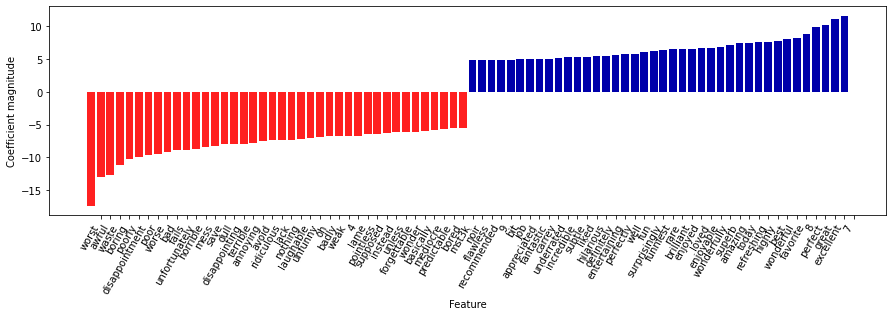

In [17]:
# Using Tfidf vectoriser 
from sklearn.model_selection import GridSearchCV
X_train_vec_news, X_test_vec_news, X_train_vec_movies, X_test_vec_movies = vectorizeAndReturn(tfidf_vectorizer)

In [18]:
#compute mutual information and select top percentile
from sklearn.feature_selection import mutual_info_classif, SelectPercentile

# IMDB
selector = SelectPercentile(mutual_info_classif, percentile = 30)
selector.fit(X_train_vec_movies,y_train_movies)
# Reduce X_train to selected features
X_train_selected_movies = selector.transform(X_train_vec_movies)
X_test_selected_movies = selector.transform(X_test_vec_movies)
print("X_train_selected:\n{}".format(repr(X_train_selected_movies)))

# 20N
selector = SelectPercentile(mutual_info_classif, percentile = 30)
selector.fit(X_train_vec_news,y_train_news)
# Reduce X_train to selected features
X_train_selected_news= selector.transform(X_train_vec_news)
X_test_selected_news= selector.transform(X_test_vec_news)
print("X_train_selected:\n{}".format(repr(X_train_selected_news)))

X_train_selected:
<25000x7308 sparse matrix of type '<class 'numpy.float64'>'
	with 3180231 stored elements in Compressed Sparse Row format>
X_train_selected:
<11314x4885 sparse matrix of type '<class 'numpy.float64'>'
	with 897139 stored elements in Compressed Sparse Row format>


## Task 2: Implement Naive Bayes and k-fold cross validation





### 2.1 Naive Bayes

In [91]:
class NB():
    def __init__(self, alpha, beta):
        # hyperparameters
        self.alpha = alpha
        self.beta = beta
        
    def fit(self, X, y):
        
        self.num_examples = X.shape[0]  # number of training examples
        self.vocab_len = X.shape[1]  # vocabulary size
        self.num_classes = len(np.bincount(y))  # number of classes
        
        self.prior = (np.bincount(y) + self.alpha) / (len(y) + self.num_classes)  # prior probability
        self.posterior = {c: np.ones(self.vocab_len)*self.beta for c in range(self.num_classes)}  # posterior probability

        for i in range(self.num_examples):
            self.posterior[y[i]] += X[i]
            #np.add(self.posterior[y[i]], X[i], out=self.posterior[y[i]], casting="unsafe")
        for c in range(self.num_classes):
            self.posterior[c] /= (np.sum(self.posterior[c]) + self.num_classes)
        
    def predict(self, X):
        y_hat = []
        
        for i in range(X.shape[0]):
            x_i = X[i]
            scores = []  # for storing log prob for each class
            for c in range(self.num_classes):
                score = np.log(self.prior[c])
                product = self.posterior[c] * x_i
                product[product == 0] = 1  # for computation convenience 
                score += np.sum(np.log(product))  # sum of log probability
                scores.append(score)
            y_hat.append(np.argmax(scores))  # choose the largest
        
        return y_hat

### 2.2 K-fold Cross Validation

In [20]:
# get k-folds train/validation set
def cross_validation_split(data, k_folds):
    x_data, y_data = data
    cv_data = []
    fold = x_data.shape[0] // k_folds  # number of folds

    for i in range(k_folds):
        x_train = np.vstack((x_data[: i*fold], x_data[(i+1)*fold: ]))  # stack left part and right part vertically
        y_train = np.hstack((y_data[: i*fold], y_data[(i+1)*fold: ]))  # stack left part and right part horizontally
        x_val = x_data[i*fold: (i+1)*fold]
        y_val = y_data[i*fold: (i+1)*fold]
        
        cv_data.append(((x_train, y_train), (x_val, y_val)))

    return cv_data

# evaluate accuracy
def evaluate_acc(y_pred, y_true):
    return sum(y_pred == y_true) / len(y_true)

# evaluate average accuracy of k-fold cross validation set
def kfoldCV(cv_data, model):
    result = 0
    for train, val in cv_data:        
        x_train, y_train = train
        x_val, y_val = val
        model.fit(x_train, y_train)
        y_hat = model.predict(x_val)
        result += evaluate_acc(y_hat, y_val)
        # print('===================== finish processing one CV set =====================')
    return result / len(cv_data)


In [192]:
# find hyperparameters of Naive Bayes model for 20 news group dataset
# this step is done offline
alpha_list =[10,0.0001,0.001,]
beta_list = [0.1, 1]

best_alpha = None; best_beta = None; best_acc = 0

CV_data = cross_validation_split((X_train_selected_news.toarray(), y_train_news), 5)

for alpha in alpha_list:
    for beta in beta_list:
        print(f'alpha: {alpha}, beta: {beta}')
        model = NB(alpha, beta)
        cur_acc = kfoldCV(CV_data, model)
        print(f'current accuracy is {cur_acc}')
        if cur_acc > best_acc:
            best_alpha = alpha; best_beta = beta; best_acc = cur_acc
        del model


print("The best hyperparameter for news dataset: ")
print("Alpha = %.5f, Beta = %.5f, Best Accuracy = %.2f" % (best_alpha, best_beta, best_acc))

alpha: 10, beta: 0.1
current accuracy is 0.6808134394341291
alpha: 10, beta: 1
current accuracy is 0.592130857648099
alpha: 0.0001, beta: 0.1
current accuracy is 0.6808134394341291
alpha: 0.0001, beta: 1
current accuracy is 0.5920424403183023
alpha: 0.001, beta: 0.1
current accuracy is 0.6808134394341291
alpha: 0.001, beta: 1
current accuracy is 0.5920424403183023
The best hyperparameter for news dataset: 
Alpha = 10.00000, Beta = 0.10000, Best Accuracy = 0.68


The best hyperparameter for news dataset (with all features): 
Alpha = 0.0001, Beta = 0.1, Best Accuracy = 0.74

The best hyperparameter for news dataset (with selected features): 
Alpha = 10, Beta = 0.1, Best Accuracy = 0.68


In [193]:
# find hyperparameters of Naive Bayes model for IMDB movies dataset
# this step is done offline
alpha_list = [0.001, 0.0001, 0.1, 0.5, 1, 10]
beta_list = [1, 0.1]

best_alpha = None; best_beta = None; best_acc = 0

CV_data = cross_validation_split((X_train_selected_movies.toarray(), y_train_movies), 5)

for alpha in alpha_list:
    for beta in beta_list:
        print(f'alpha: {alpha}, beta: {beta}')
        model = NB(alpha, beta)
        cur_acc = kfoldCV(CV_data, model)
        print(f'current accuracy is {cur_acc}')
        if cur_acc > best_acc:
            best_alpha = alpha; best_beta = beta; best_acc = cur_acc
        del model

print("The best hyperparameter for movie dataset: ")
print("Alpha = %.5f, Beta = %.5f, Best Accuracy = %.2f" % (best_alpha, best_beta, best_acc))

alpha: 0.001, beta: 1
current accuracy is 0.8472799999999999
alpha: 0.001, beta: 0.1
current accuracy is 0.85204
alpha: 0.0001, beta: 1
current accuracy is 0.8472799999999999
alpha: 0.0001, beta: 0.1
current accuracy is 0.85204
alpha: 0.1, beta: 1
current accuracy is 0.8472799999999999
alpha: 0.1, beta: 0.1
current accuracy is 0.85204
alpha: 0.5, beta: 1
current accuracy is 0.8472799999999999
alpha: 0.5, beta: 0.1
current accuracy is 0.85204
alpha: 1, beta: 1
current accuracy is 0.8472799999999999
alpha: 1, beta: 0.1
current accuracy is 0.85204
alpha: 10, beta: 1
current accuracy is 0.8472799999999999
alpha: 10, beta: 0.1
current accuracy is 0.85204
The best hyperparameter for movie dataset: 
Alpha = 0.00100, Beta = 0.10000, Best Accuracy = 0.85


The best hyperparameter for movie dataset (with all features): 
Alpha = 0.0001, Beta = 0.1, Best Accuracy = 0.86

No processing Alpha = 1, Beta = 1, Best Accuracy = 0.83

The best hyperparameter for movie dataset (with selected features): 
Alpha = 0001, Beta = 0.1, Best Accuracy = 0.85

## Task 3: Run experiments
> 

#### 3.1 Dataset Overview and Define key Functions

In [ ]:
# Split into train, validation, test sets
from sklearn.model_selection import train_test_split


#### Evaluation for NB

In [224]:
# performance evaluation of Naive Bayes model for 20 news group dataset
nb_news = NB(0.0001, 0.1)
nb_news.fit(X_train_vec_news.toarray(), y_train_news)
y_pred_news = nb_news.predict(X_test_vec_news.toarray())
print("The accuracy for news dataset: %.3f" % evaluate_acc(y_pred_news, y_test_news))

The accuracy for news dataset: 0.66


In [219]:
print("The accuracy for news dataset: %.3f" % evaluate_acc(y_pred_news, y_test_news))

The accuracy for news dataset: 0.665


The accuracy for news dataset: 0.66


In [225]:
# performance evaluation of Naive Bayes model for IMDB movies dataset

nb_movies = NB(0.0001, 0.1)
nb_movies.fit(X_train_vec_movies.toarray(), y_train_movies)
y_pred_movies = nb_movies.predict(X_test_vec_movies.toarray())
print("The accuracy for movies dataset: %.3f" % evaluate_acc(y_pred_movies, y_test_movies))

The accuracy for movies dataset: 0.82


In [234]:
from sklearn import metrics
print("The accuracy for movies dataset: %.3f" % evaluate_acc(y_pred_movies, y_test_movies))
metrics.f1_score(y_test_movies, y_pred_movies, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')

The accuracy for movies dataset: 0.821


0.8004817342432758

The accuracy for movies dataset: 0.82

Text(0.5, 1.0, 'Prediction Counts by Class on IMDB')

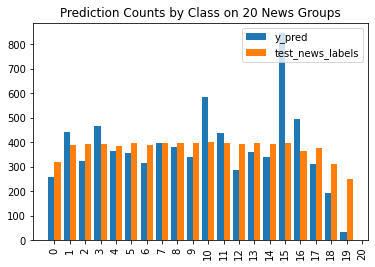

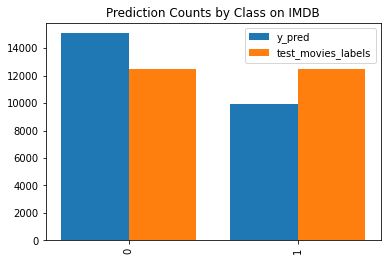

In [228]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
# 20N
bins = np.linspace(0, 20, 21,dtype=int)
fig, ax = plt.subplots()
ax.set_xticks(bins + 0.5)
ax.set_xticklabels(bins,rotation=90, horizontalalignment='center')
_ = ax.hist([y_pred_news, y_test_news], bins, label=['y_pred', 'test_news_labels'])
pyplot.legend(loc='upper right')
pyplot.title('Prediction Counts by Class on 20 News Groups', fontdict=None, loc='center', pad=None)
# IMDB
bins = np.linspace(0, 2, 3,dtype=int)
fig, ax = plt.subplots()
ax.set_xticks(bins + 0.5)
ax.set_xticklabels(bins,rotation=90, horizontalalignment='center')
_ = ax.hist([y_pred_movies, y_test_movies], bins, label=['y_pred', 'test_movies_labels'])
pyplot.legend(loc='upper right')
pyplot.title('Prediction Counts by Class on IMDB', fontdict=None, loc='center', pad=None)


In [230]:
x = ['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

dx = pd.DataFrame(x)
display(dx)

,0
0,alt.atheism
1,comp.graphics
2,comp.os.ms-windows.misc
3,comp.sys.ibm.pc.hardware
4,comp.sys.mac.hardware
5,comp.windows.x
6,misc.forsale
7,rec.autos
8,rec.motorcycles
9,rec.sport.baseball


On selected features

In [221]:
# performance evaluation of Naive Bayes model for 20 news group dataset
print("X_train_selected:\n{}".format(repr(X_train_selected_news)))
print("X_test_selected:\n{}".format(repr(X_test_selected_news)))
nb_news = NB(0.001, 0.1)
nb_news.fit(X_train_selected_news.toarray(), y_train_news)
y_pred_news = nb_news.predict(X_test_selected_news.toarray())

print("The accuracy for news dataset: %.3f" % evaluate_acc(y_pred_news, y_test_news))

X_train_selected:
<11314x4885 sparse matrix of type '<class 'numpy.float64'>'
	with 897139 stored elements in Compressed Sparse Row format>
X_test_selected:
<7532x4885 sparse matrix of type '<class 'numpy.float64'>'
	with 579100 stored elements in Compressed Sparse Row format>
The accuracy for news dataset: 0.637


In [222]:
# performance evaluation of Naive Bayes model for IMDB
print("X_train_selected:\n{}".format(repr(X_train_selected_movies)))
print("X_test_selected:\n{}".format(repr(X_test_selected_movies)))
nb_movies = NB(10, 0.1)
nb_movies.fit(X_train_selected_movies.toarray(), y_train_movies)
y_pred_movies = nb_movies.predict(X_test_selected_movies.toarray())

print("The accuracy for news dataset: %.3f" % evaluate_acc(y_pred_movies, y_test_movies))

X_train_selected:
<25000x7308 sparse matrix of type '<class 'numpy.float64'>'
	with 3180231 stored elements in Compressed Sparse Row format>
X_test_selected:
<25000x7308 sparse matrix of type '<class 'numpy.float64'>'
	with 3115785 stored elements in Compressed Sparse Row format>
The accuracy for news dataset: 0.839


In [121]:
# given the entire training set, return the portion of that dataset specified by partition percentage k
def getPartition(X, y, k=1):
    size = X.shape[0]
    indices = [i for i in range(size)]  # shuffle indices
    
    random.shuffle(indices)
    return X[indices[:int(k*size)]], y[indices[:int(k*size)]]

In [125]:
# get the accuracy of both news dataset and movies dataset given the different portion of training set
# The model we use is Naive Bayes with the best hyperparameters tuned by cross validation
def partitionAndPlot(X_train_vec_news, y_train_news, X_test_vec_news, y_test_news):
  partition_list = [0.2, 0.4, 0.6, 0.8, 1]  # all possible partition percentage
  acc_list_news = []
  acc_list_movies = []

  for partition in partition_list:
      X_train, y_train = getPartition(X_train_vec_news, y_train_news, partition)
      model = NB(0.0001, 0.1)
      model.fit(X_train.toarray(), y_train)
      y_pred = model.predict(X_test_vec_news.toarray())
      acc = evaluate_acc(y_pred, y_test_news)
      acc_list_news.append(acc)

  # plot Naive Bayes accuracy against different portion of training set on News dataset
  x_label = ['20%', '40%', '60%', '80%', '100%']
  plt.xticks(partition_list, x_label)
  plt.xlabel('partition percentage')
  plt.ylabel('accuracy')
  plt.title('Accuracy against Partition Percentage on News Dataset')
  plt.plot(partition_list, acc_list_news)
  plt.show()

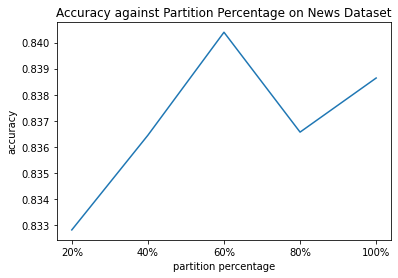

In [126]:
partitionAndPlot(X_train_selected_movies, y_train_movies, X_test_selected_movies, y_test_movies)

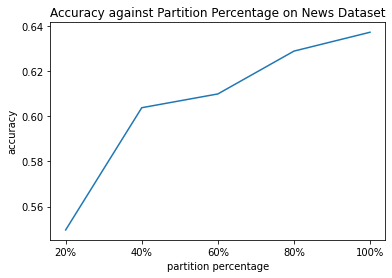

In [127]:
partitionAndPlot(X_train_selected_news, y_train_news, X_test_selected_news, y_test_news)

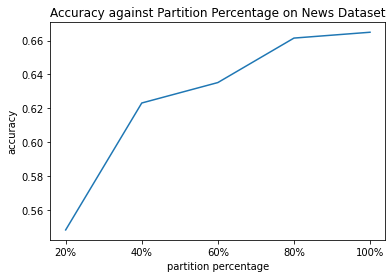

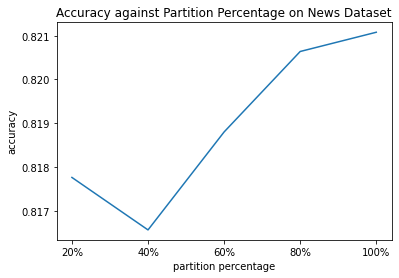

In [216]:
partitionAndPlot(X_train_vec_news, y_train_news, X_test_vec_news, y_test_news)
partitionAndPlot(X_train_vec_movies, y_train_movies, X_test_vec_movies, y_test_movies)

In [223]:
print(repr(X_train_vec_news))
print(repr(X_train_vec_movies))
print("Movies")

<11314x16282 sparse matrix of type '<class 'numpy.float64'>'
	with 1013051 stored elements in Compressed Sparse Row format>
<25000x24363 sparse matrix of type '<class 'numpy.float64'>'
	with 3409189 stored elements in Compressed Sparse Row format>
Movies


In [ ]:
# plot Naive Bayes accuracy against different portion of training set on News dataset
x_label = ['20%', '40%', '60%', '80%', '100%']
plt.xticks(partition_list, x_label)
plt.xlabel('partition percentage')
plt.ylabel('accuracy')
plt.title('Accuracy against Partition Percentage on News Dataset')
plt.plot(partition_list, acc_list_news)
plt.show()

# **5-fold Cross validation & grid search for best C in logistic regression**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.random import permutation
from IPython.core.debugger import set_trace  
from sklearn.datasets import fetch_20newsgroups
import os
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn import svm

import nltk
nltk.download('wordnet')

# Set the seed for reproducibility (initializes the random number generator)
np.random.seed(500)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


### 20 data set (Lorraine's version do not run)

In [ ]:
twenty_train_text = [elem[0] for elem in twenty_train]
twenty_train_labels = [elem[1] for elem in twenty_train]

In [ ]:
twenty_test_text = [elem[0] for elem in twenty_test]
twenty_test_labels = [elem[1] for elem in twenty_test]

In [ ]:
import re

REPLACE_NO_SPACE = re.compile("[.;:!\'?,\"()\[\]]")
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")

def preprocess_reviews(reviews):
    reviews = [REPLACE_NO_SPACE.sub("", line.lower()) for line in reviews]
    reviews = [REPLACE_WITH_SPACE.sub(" ", line) for line in reviews]
    
    return reviews

In [ ]:
twenty_train_text = preprocess_reviews(twenty_train_text)     #perform general processing
print("type of text_train: {}".format(type(twenty_train_text)))
print("length of text_train: {}".format(len(twenty_train_text)))
print("Samples per class (training): {}".format(np.bincount(twenty_train_labels)))

type of text_train: <class 'list'>
length of text_train: 11314
Samples per class (training): [480 584 591 590 578 593 585 594 598 597 600 595 591 594 593 599 546 564
 465 377]


In [ ]:
twenty_train_text[:5] 

['i was wondering if anyone out there could enlighten me on this car i saw the other day it was a 2 door sports car looked to be from the late 60s  early 70s it was called a bricklin the doors were really small in addition the front bumper was separate from the rest of the body this is all i know if anyone can tellme a model name engine specs years of production where this car is made history or whatever info you have on this funky looking car please e mail',
 'a fair number of brave souls who upgraded their si clock oscillator have shared their experiences for this poll please send a brief message detailing your experiences with the procedure top speed attained cpu rated speed add on cards and adapters heat sinks hour of usage per day floppy disk functionality with 800 and 14 m floppies are especially requested i will be summarizing in the next two days so please add to the network knowledge base if you have done the clock upgrade and havent answered this poll thanks',
 'well folks my

In [ ]:
twenty_test_text = preprocess_reviews(twenty_test_text)     #perform general processing
print("type of text_train: {}".format(type(twenty_test_text)))
print("length of text_train: {}".format(len(twenty_test_text)))
print("Samples per class (training): {}".format(np.bincount(twenty_test_labels)))

type of text_train: <class 'list'>
length of text_train: 7532
Samples per class (training): [319 389 394 392 385 395 390 396 398 397 399 396 393 396 394 398 364 376
 310 251]


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(min_df = 5)
cv.fit(twenty_train_text)
X = cv.transform(twenty_train_text)
X_test = cv.transform(twenty_test_text)

In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

def train_lr(percentage, X, labels):
  # randomly select the passed in percentage of the original dataset
  X_subset, _, y_subset, _ = train_test_split(
      X, labels, train_size = percentage, random_state=42, shuffle=True
  )
 # perform train test split on the subset
  X_train, X_val, y_train, y_val = train_test_split(
      X_subset, y_subset, train_size = 0.8, shuffle=False
  )
  best_c = 0.01
  tmp_acc = 0

  # creativity (add experiments for tol hypermeter [1e-5, 1e-4, 1e-3])
  for c in [0.01, 0.05, 0.25, 0.5, 1, 10]:
  
      lr = LogisticRegression(C=c, max_iter=500)
      lr.fit(X_train, y_train)
      acc = accuracy_score(y_val, lr.predict(X_val))
      print ("Accuracy for C=%s: %s" % (c, acc))
      
      if acc > tmp_acc:
        best_c = c
        tmp_acc = acc

  print(f'Best C tol for Logistic Regression is {best_c}')

  return best_c, X_subset, y_subset
    

In [136]:
def compare_lr_acc(X, train_labels, X_test, test_labels):

  acc_list = []
  percentage_list = [0.2, 0.4, 0.6, 0.8]

  for tmp_perc in percentage_list:
    print(f'Current percentage is {tmp_perc}')
    best_c, X_subset, y_subset = train_lr(tmp_perc, X, train_labels)

    final_model = LogisticRegression(C=best_c, max_iter=500)
    final_model.fit(X_subset, y_subset)
    test_acc = accuracy_score(test_labels, final_model.predict(X_test))
    print (f"Final Accuracy: {test_acc}")

    acc_list.append(test_acc)

  plt.plot(percentage_list, acc_list)
  plt.xlabel('Percentage of the Original Dataset')
  plt.ylabel('Accuracy')

In [145]:
# get the accuracy of both news dataset and movies dataset given the different portion of training set
# The model we use is Naive Bayes with the best hyperparameters tuned by cross validation
def partitionAndPlotLr(X_train_vec_news, y_train_news, X_test_vec_news, y_test_news):
  partition_list = [0.2, 0.4, 0.6, 0.8, 1]  # all possible partition percentage
  acc_list_news = []
  acc_list_movies = []

  for partition in partition_list:
      X_train, y_train = getPartition(X_train_vec_news, y_train_news, partition)

      model = LogisticRegression(C=10, max_iter=500)
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test_vec_news)
      acc = evaluate_acc(y_pred, y_test_news)
      acc_list_news.append(acc)

      # test_acc = accuracy_score(test_labels, final_model.predict(X_test))
      

      # model = NB(0.0001, 0.1)
      # model.fit(X_train.toarray(), y_train)
      # y_pred = model.predict(X_test_vec_news.toarray())
      # acc = evaluate_acc(y_pred, y_test_news)
      # acc_list_news.append(acc)

  print (f"Final Accuracy: {acc_list_news[-1]}")
  # plot Naive Bayes accuracy against different portion of training set on News dataset
  x_label = ['20%', '40%', '60%', '80%', '100%']
  plt.xticks(partition_list, x_label)
  plt.xlabel('partition percentage')
  plt.ylabel('accuracy')
  plt.title('Accuracy against Partition Percentage on News Dataset')
  plt.plot(partition_list, acc_list_news)
  plt.show()

Final Accuracy: 0.640201805629315


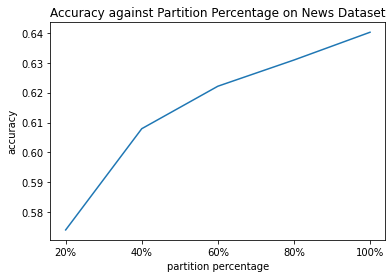

Final Accuracy: 0.6737918215613383


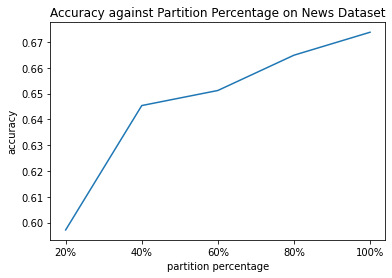

In [146]:
partitionAndPlotLr(X_train_selected_news, y_train_news, X_test_selected_news, y_test_news)
partitionAndPlotLr(X_train_vec_news, y_train_news, X_test_vec_news, y_test_news)

In [152]:
from collections import Counter

label = y_train_movies
print(Counter(label).keys()) # equals to list(set(words))
print(Counter(label).values()) # counts the elements' frequency

label = y_test_movies
print(Counter(label).keys()) # equals to list(set(words))
Counter(label).values() # counts the elements' frequency

dict_keys([0, 1])
dict_values([12500, 12500])
dict_keys([0, 1])


dict_values([12500, 12500])

Final Accuracy: 0.87952


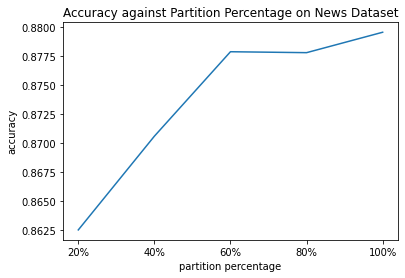

Final Accuracy: 0.87976


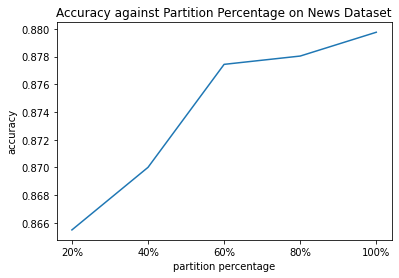

In [147]:
partitionAndPlotLr(X_train_selected_movies, y_train_movies, X_test_selected_movies, y_test_movies)
partitionAndPlotLr(X_train_vec_movies, y_train_movies, X_test_vec_movies, y_test_movies)

In [235]:
# FINAL NEWS ON 100%
model = LogisticRegression(C=10, max_iter=500)
model.fit(X_train_vec_news, y_train_news)
y_pred_news= model.predict(X_test_vec_news)
print(evaluate_acc(y_pred_news, y_test_news))
# FINAL IMDB ON 100%
model = LogisticRegression(C=10, max_iter=500)
model.fit(X_train_vec_movies, y_train_movies)
y_pred_movies= model.predict(X_test_vec_movies)
print(evaluate_acc(y_pred_movies, y_test_movies))
metrics.f1_score(y_test_movies, y_pred_movies, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')


0.6737918215613383
0.8798


0.87840407882491

Text(0.5, 1.0, 'Prediction Counts by Class on IMDB')

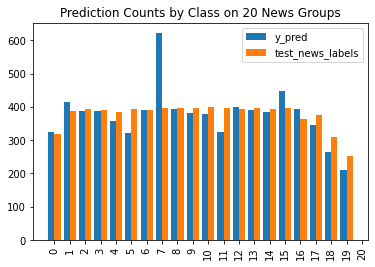

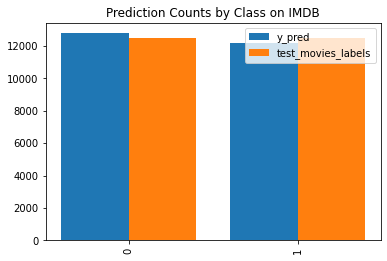

In [190]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
# 20N
bins = np.linspace(0, 20, 21,dtype=int)
fig, ax = plt.subplots()
ax.set_xticks(bins + 0.5)
ax.set_xticklabels(bins,rotation=90, horizontalalignment='center')
_ = ax.hist([y_pred_news, y_test_news], bins, label=['y_pred', 'test_news_labels'])
pyplot.legend(loc='upper right')
pyplot.title('Prediction Counts by Class on 20 News Groups', fontdict=None, loc='center', pad=None)
# IMDB
bins = np.linspace(0, 2, 3,dtype=int)
fig, ax = plt.subplots()
ax.set_xticks(bins + 0.5)
ax.set_xticklabels(bins,rotation=90, horizontalalignment='center')
_ = ax.hist([y_pred_movies, y_test_movies], bins, label=['y_pred', 'test_movies_labels'])
pyplot.legend(loc='upper right')
pyplot.title('Prediction Counts by Class on IMDB', fontdict=None, loc='center', pad=None)


In [ ]:
 compare_lr_acc(X, twenty_train_labels, X_test, twenty_test_labels)

Current percentage is 0.2
Accuracy for C=0.01: 0.0684326710816777
Accuracy for C=0.05: 0.2781456953642384
Accuracy for C=0.25: 0.45474613686534215
Accuracy for C=0.5: 0.5099337748344371
Accuracy for C=1: 0.5342163355408388
Accuracy for C=10: 0.5673289183222958
Best C tol for Logistic Regression is 10
Final Accuracy: 0.5738183749336165
Current percentage is 0.4
Accuracy for C=0.01: 0.06077348066298342
Accuracy for C=0.05: 0.3580110497237569
Accuracy for C=0.25: 0.5756906077348066
Accuracy for C=0.5: 0.6044198895027625
Accuracy for C=1: 0.6320441988950276
Accuracy for C=10: 0.6353591160220995
Best C tol for Logistic Regression is 10
Final Accuracy: 0.6068773234200744
Current percentage is 0.6
Accuracy for C=0.01: 0.14432989690721648
Accuracy for C=0.05: 0.47790868924889546
Accuracy for C=0.25: 0.6244477172312224
Accuracy for C=0.5: 0.6399116347569955
Accuracy for C=1: 0.6516936671575847
Accuracy for C=10: 0.666421207658321
Best C tol for Logistic Regression is 10
Final Accuracy: 0.618428

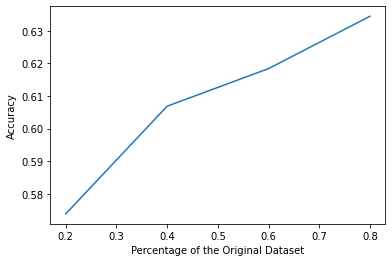

In [137]:
compare_lr_acc(X_train_selected_news, y_train_news, X_test_selected_news, y_test_news)

Current percentage is 0.2
entered train_lr function
done split 1
done split 2
Accuracy for C=0.01: 0.04194260485651214
Accuracy for C=0.05: 0.2163355408388521
Accuracy for C=0.25: 0.4105960264900662
Accuracy for C=0.5: 0.5209713024282561
Accuracy for C=1: 0.5673289183222958
Best C tol for Logistic Regression is 1
Final Accuracy: 0.5785979819437068
Current percentage is 0.4
entered train_lr function
done split 1
done split 2
Accuracy for C=0.01: 0.13480662983425415
Accuracy for C=0.05: 0.33259668508287293
Accuracy for C=0.25: 0.5447513812154696
Accuracy for C=0.5: 0.6099447513812155
Accuracy for C=1: 0.6397790055248619
Best C tol for Logistic Regression is 1
Final Accuracy: 0.6314391927774827
Current percentage is 0.6
entered train_lr function
done split 1
done split 2
Accuracy for C=0.01: 0.20618556701030927
Accuracy for C=0.05: 0.4698085419734904
Accuracy for C=0.25: 0.6163475699558174
Accuracy for C=0.5: 0.6597938144329897
Accuracy for C=1: 0.6767304860088366
Best C tol for Logistic 

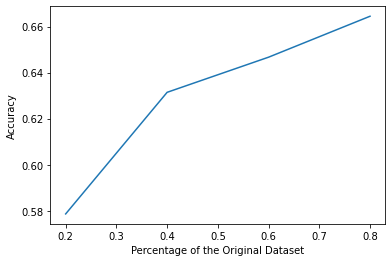

In [ ]:
compare_lr_acc(X_train_vec_news, y_train_news, X_test_vec_news, y_test_news)

In [ ]:
compare_lr_acc(X_train_selected_movies, y_train_movies, X_test_selected_movies, y_test_movies)

Current percentage is 0.2
Accuracy for C=0.01: 0.0684326710816777
Accuracy for C=0.05: 0.2781456953642384
Accuracy for C=0.25: 0.45474613686534215
Accuracy for C=0.5: 0.5099337748344371
Accuracy for C=1: 0.5342163355408388
Accuracy for C=10: 0.5673289183222958
Best C tol for Logistic Regression is 10
Final Accuracy: 0.5738183749336165
Current percentage is 0.4
Accuracy for C=0.01: 0.06077348066298342
Accuracy for C=0.05: 0.3580110497237569
Accuracy for C=0.25: 0.5756906077348066
Accuracy for C=0.5: 0.6044198895027625
Accuracy for C=1: 0.6320441988950276
Accuracy for C=10: 0.6353591160220995
Best C tol for Logistic Regression is 10


Current percentage is 0.2
entered train_lr function
done split 1
done split 2
Accuracy for C=0.01: 0.678
Accuracy for C=0.05: 0.763
Accuracy for C=0.25: 0.811
Accuracy for C=0.5: 0.835
Accuracy for C=1: 0.851
Best C tol for Logistic Regression is 1
Final Accuracy: 0.8582
Current percentage is 0.4
entered train_lr function
done split 1
done split 2
Accuracy for C=0.01: 0.7625
Accuracy for C=0.05: 0.7955
Accuracy for C=0.25: 0.8485
Accuracy for C=0.5: 0.8635
Accuracy for C=1: 0.874
Best C tol for Logistic Regression is 1
Final Accuracy: 0.87216
Current percentage is 0.6
entered train_lr function
done split 1
done split 2
Accuracy for C=0.01: 0.779
Accuracy for C=0.05: 0.8173333333333334
Accuracy for C=0.25: 0.86
Accuracy for C=0.5: 0.8723333333333333
Accuracy for C=1: 0.8813333333333333
Best C tol for Logistic Regression is 1
Final Accuracy: 0.87692
Current percentage is 0.8
entered train_lr function
done split 1
done split 2
Accuracy for C=0.01: 0.78475
Accuracy for C=0.05: 0.82525
Accu

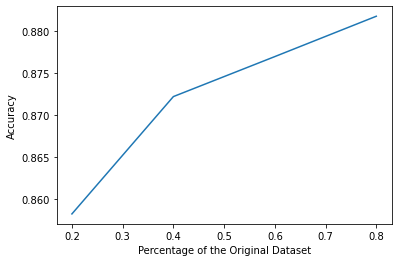

In [ ]:
compare_lr_acc(X_train_vec_movies, y_train_movies, X_test_vec_movies, y_test_movies)

**Imdb Dataset**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv2 = CountVectorizer(min_df = 1)
X2 = cv2.fit_transform(movies_train)
print(movies_train)
X2 = cv2.transform(movies_train)
X2_test = cv2.transform(movies_test)

In [ ]:
movies_test_labels=movies_test["label"].tolist()
movies_train_labels=movies_train["label"].tolist()

In [ ]:
compare_lr_acc(X2, movies_train_labels, X2_test, movies_test_labels)

In [ ]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train_vec_movies, y_train_movies)
test_acc = accuracy_score(movies_test_labels, final_model.predict(X2_test))
print ("Final Accuracy: ", test_acc)
print("Best parameters: ", grid.best_params_)

### 3.4 Creative Experiment


#### Random Forest

In [196]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_news_forest = sc.fit_transform(X_train_selected_news.toarray())
X_test_news_forest = sc.transform(X_test_selected_news.toarray())

X_train_movies_forest = sc.fit_transform(X_train_selected_movies.toarray())
X_test_movies_forest = sc.transform(X_test_selected_movies.toarray())

In [198]:
from sklearn.ensemble import RandomForestRegressor
# y_pred = news
# y_pred_fr = IMDB
regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train_news_forest, y_train_news)
y_pred = regressor.predict(X_test_news_forest)
acc = evaluate_acc(y_pred, y_test_news)
print(acc)

0.007966011683483803


In [200]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train_selected_news, y_train_news)
y_pred = svclassifier.predict(X_test_selected_news)
acc = evaluate_acc(y_pred, y_test_news)
print(acc)

0.6216144450345193


In [201]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train_selected_news, y_train_news)
y_pred = svclassifier.predict(X_test_selected_news)
acc = evaluate_acc(y_pred, y_test_news)
print(acc)

0.630509824747743


In [202]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf', C=10)
svclassifier.fit(X_train_selected_news, y_train_news)
y_pred = svclassifier.predict(X_test_selected_news)
acc = evaluate_acc(y_pred, y_test_news)
print(acc)

0.6331651619755709


In [19]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf', C=10)
svclassifier.fit(X_train_selected_movies, y_train_movies)
y_pred = svclassifier.predict(X_test_selected_movies)
acc = evaluate_acc(y_pred, y_test_movies)
print(acc)

NameError: ignored

In [21]:
acc = evaluate_acc(y_pred, y_test_movies)
print(acc)

0.885


In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train_selected_movies, y_train_movies)
y_pred = svclassifier.predict(X_test_selected_movies)
acc = evaluate_acc(y_pred, y_test_movies)
print(acc)

In [204]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf', C=20)
svclassifier.fit(X_train_selected_news, y_train_news)
y_pred = svclassifier.predict(X_test_selected_news)
acc = evaluate_acc(y_pred, y_test_news)
print(acc)

0.6326340945300053


In [203]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly')
svclassifier.fit(X_train_selected_news, y_train_news)
y_pred = svclassifier.predict(X_test_selected_news)
acc = evaluate_acc(y_pred, y_test_news)
print(acc)

0.5063728093467871


In [ ]:
# 20N
bins = np.linspace(0, 20, 21,dtype=int)
fig, ax = plt.subplots()
ax.set_xticks(bins + 0.5)
ax.set_xticklabels(bins,rotation=90, horizontalalignment='center')
_ = ax.hist([y_pred, y_test_news], bins, label=['y_pred', 'test_news_labels'])
pyplot.legend(loc='upper right')
pyplot.title('Prediction Counts by Class on 20 News Groups', fontdict=None, loc='center', pad=None)
# IMDB
bins = np.linspace(0, 2, 3,dtype=int)
fig, ax = plt.subplots()
ax.set_xticks(bins + 0.5)
ax.set_xticklabels(bins,rotation=90, horizontalalignment='center')
_ = ax.hist([y_pred_movies, y_test_movies], bins, label=['y_pred', 'test_movies_labels'])
pyplot.legend(loc='upper right')
pyplot.title('Prediction Counts by Class on IMDB', fontdict=None, loc='center', pad=None)
